In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

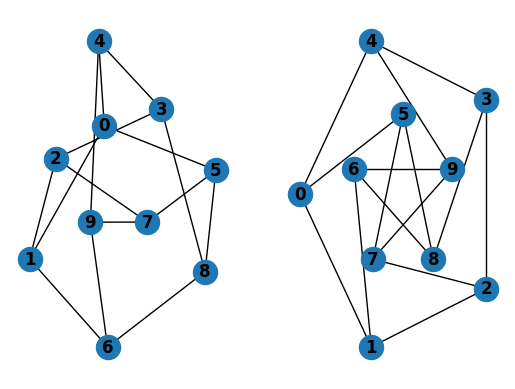

In [3]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


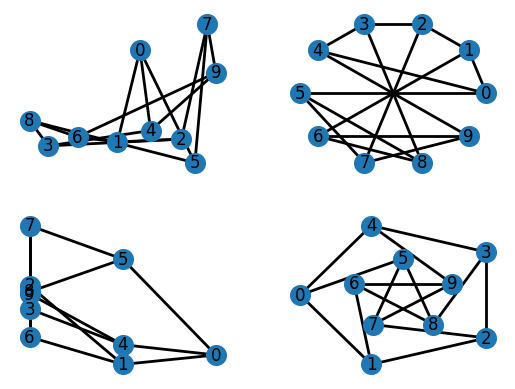

In [4]:
options = {
    'with_labels': True,
    'node_size': 200,
    'width': 2, # thickness of edges
}

plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)    
nx.draw_shell(G, nlist=[range(5, 10), range(5)], **options)


Is the graph strongly connected?
Short way:  False
Long way:  False
Is the graph weakly connected?
Short way:  True
Long way:  True


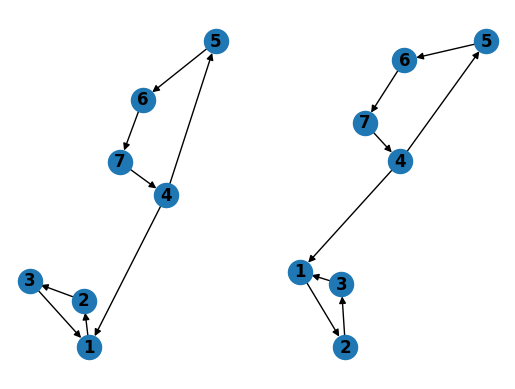

In [5]:
# a lot of algorithms are available from the graph theory
# it is possible to perform complex graph analysis in a simple way:

# networkx.algorithms.<TAB>:

# nx.algorithms.components
# nx.algorithms.cycles

##############################
# strong connectivity (only possible when directed graph)

DG = nx.DiGraph()
DG.add_edges_from([(1,2),(2,3),(3,1),(4,5),(5,6),(6,7),(7,4),(4,1)])
plt.subplot(121)
nx.draw(DG, with_labels=True, font_weight='bold')

# strongly connected?
answer_short = nx.is_strongly_connected(DG)

# it is possible to write it the long way:
answer_long = nx.algorithms.components.strongly_connected.is_strongly_connected(DG)

# print both answers with description
print("Is the graph strongly connected?")
print("Short way: ", answer_short)
print("Long way: ", answer_long)

# weakly connected?
plt.subplot(122)
nx.draw(DG, with_labels=True, font_weight='bold')
answer_short = nx.is_weakly_connected(DG)
answer_long = nx.algorithms.components.weakly_connected.is_weakly_connected(DG)
print("Is the graph weakly connected?")
print("Short way: ", answer_short)
print("Long way: ", answer_long)


Number of connected components: 2


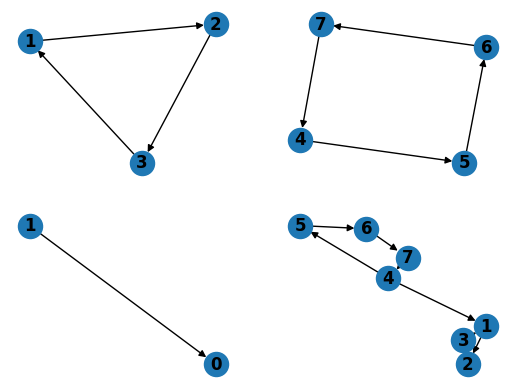

In [6]:
ncc = nx.number_strongly_connected_components(DG)
print("Number of connected components:", ncc)

# strongly connected components
scc = nx.strongly_connected_components(DG)
sub1, sub2 = scc

# draw them
plt.subplot(221)
nx.draw(DG.subgraph(sub1), with_labels=True, font_weight='bold')
plt.subplot(222)
nx.draw(DG.subgraph(sub2), with_labels=True, font_weight='bold')

# condensation graph
condensation = nx.condensation(DG)
plt.subplot(223)
nx.draw(condensation, with_labels=True, font_weight='bold')

# original graph
plt.subplot(224)
nx.draw(DG, with_labels=True, font_weight='bold')


In [7]:
# question: can a condensation graph with more than one node be strongly connected?
# answer: no, because if it was strongly connected, it would mean that the original graph was strongly connected

# explore a condensation graph
print("Nodes:", dict(condensation.nodes()))

# mapping:
mapping = condensation.graph['mapping']
print("Mapping:", mapping)

Nodes: {0: {'members': {1, 2, 3}}, 1: {'members': {4, 5, 6, 7}}}
Mapping: {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}


Number of sinks: 1
Sink: {1, 2, 3}


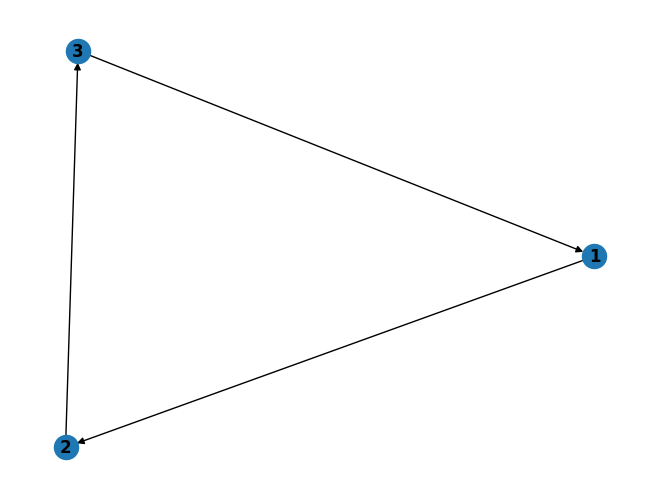

In [8]:
# let's  dive into sinks:
# number of snks: attracting components of DG
number_sinks = nx.number_attracting_components(DG)
print("Number of sinks:", number_sinks)

# sinks: attracting components of DG
sinks = nx.attracting_components(DG)
for s in sinks: print("Sink:", s)

# or we can use the subgraph function
for s in nx.attracting_components(DG):
    nx.draw(DG.subgraph(s), with_labels=True, font_weight='bold')


In [9]:
# a cycle is a closed path where no node appears twice.
# two cycles are different if they are not cyclic permutations of each other.

# networkx provides a function to find cycles in a graph: simple_cycles(G)
# it returns a generator of lists of nodes, one for each cycle.

for cycle in nx.simple_cycles(DG):
    print(f"Cycle: {cycle}\tLength: {len(cycle)}")

Cycle: [4, 5, 6, 7]	Length: 4
Cycle: [1, 2, 3]	Length: 3


In [10]:
# period of a node:
# Greatest common divisor of all cycle lengths that pass through the node.

# import GCD function from math module
from math import gcd
from functools import reduce

# let's find the period of each node
cycles = list(nx.simple_cycles(DG))

for node in DG.nodes:
    # find lens of cycles that pass through that node
    cycles_len = [len(cycle) for cycle in cycles if node in cycle]
    # find GCD of lens
    period = reduce(gcd, cycles_len)
    print(f"Node: {node}\t|\tPeriod: {period}")



Node: 1	|	Period: 3
Node: 2	|	Period: 3
Node: 3	|	Period: 3
Node: 4	|	Period: 4
Node: 5	|	Period: 4
Node: 6	|	Period: 4
Node: 7	|	Period: 4


In [11]:
import networkx as nx
from math import gcd
from functools import reduce

# create a directed graph
DG = nx.DiGraph()
DG.add_edges_from([(1,2),(2,3),(3,1),(4,5),(5,6),(6,7),(7,4),(4,1)])

# find all cycles in the graph
cycles = list(nx.simple_cycles(DG))

# calculate the period of the graph
cycles_len = [len(cycle) for cycle in cycles]
period = reduce(gcd, cycles_len)

# print the result
print(f"Period: {period}")

# what is the definition of period of the graph?
# the period of a graph is the greatest common divisor of all cycle lengths in the graph.



Period: 1


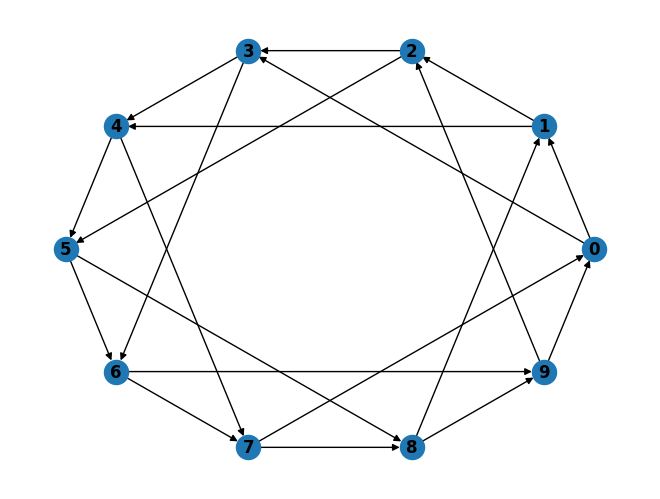

In [16]:
# consider this directed graph and do these:
# 1. check periodicity of the graph
# 2. check strong connectivity of the graph
# 3. compute period of graph

# when a graph is periodic?
# a graph is periodic if it has a period greater than 1.

# note that in a strongly connected graph, the period is the same for all nodes.

DG = nx.DiGraph()
n_nodes = 10
nx.add_cycle(DG, range(n_nodes))

for n in range(n_nodes):
    DG.add_edge(n, (n+3)%n_nodes)

nx.draw_circular(DG, with_labels=True, font_weight='bold')

In [25]:
# check periodicity of the graph
print("The graph...")
print(f"Is aperiodic: {nx.is_aperiodic(DG)}")

# check strong connectivity of the graph
print(f"Is strongly connected: {nx.is_strongly_connected(DG)}")

# compute period of graph (short way)
cycles = list(nx.simple_cycles(DG))
cycles_len = [len(cycle) for cycle in cycles]
period = reduce(gcd, cycles_len)
print(f"Has period: {period}")

The graph...
Is aperiodic: False
Is strongly connected: True
Has period: 2


In [35]:
# check periodicity of node 0 -> period of graph
cycles_len = [len(cycle) for cycle in nx.simple_cycles(DG) if 0 in cycle]
period = reduce(gcd, cycles_len)

print(f"Node 0 has period: {period}")


Node 0 has period: 2


Number of subgraphs: 64


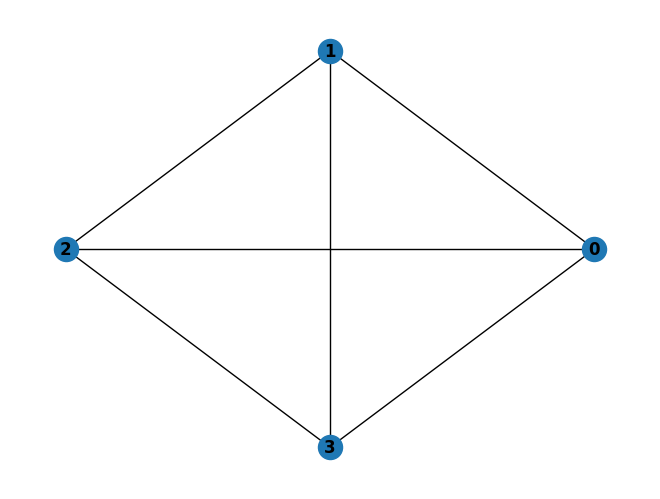

In [92]:
# let's see some properties of spanning subgraphs
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# create an example graph:
G = nx.Graph()
nx.add_cycle(G, range(4))
G.add_edges_from([(0,2),(1,3)])

# draw the graph
nx.draw_circular(G, with_labels=True, font_weight='bold')

# compute the powerset of a given set
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return list(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))

# use it to find all possible subgraphs of G
subgraphs = [G.edge_subgraph(sg) for sg in powerset(G.edges()) if len(sg)>0]

# print the number of subgraphs
print(f"Number of subgraphs: {len(subgraphs)+1}")

In [93]:
# compute and draw all the spanning graphs of G (they are trees)
# for subgraph in subgraphs:
#     if nx.is_tree(G.edge_subgraph(subgraph)):
#         nx.draw_circular(G.edge_subgraph(subgraph), with_labels=True, font_weight='bold')
#         plt.show() 

n_nodes = 4
spanning_trees = [H for H in subgraphs if nx.is_tree(H) and len(H.nodes()) == n_nodes]
len(spanning_trees)

16